In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import geopandas as gpd

### 1
Which of the following (select all that apply) is true for the binary classification confusion matrix report:
* a) it reports sizes of each cluster and number of the clusters;
* b) it is a square matrix;
* c) it is symmetrical;
* d) it has dimensions $2\times2$;
* e) it has dimensions $3\times3$;
* f) it reports the quality of classification fit over the test set;
* g) it reports the percentage of correctly classified datapoints over the test set;
* h) it reports the percentage of incorrectly classified datapoints over the test set;

Responses here 
b)
d)
f)

### 2
Given the following synthetic data and the plotting function provided for you, you are to implement two classification models: Logistic Regression and SVC.

a. Partition the data into training and testing sets of equal size.

b. Create a logistic regression model with C=10000 and fit the model with the training data

c. Report the coefficients and intercept of the fitted model (consult the API documentation for these statistics)

d. Use the plot_decision_regions function to plot the test data and the classifier

e. Construct the confusion matrix such that you can report TP, FP, TN, and FN. Using those four values, report the accuracy, precision, and recall of your predictions from the logistic regression model

f. Create a support vector classifier with C=10000 and a linear kernel. Fit the model with the training data.

g. Use the plot_decision_regions function to plot the test data and the classifier

h. Construct the confusion matrix such that you can report TP, FP, TN, and FN. Using those four values, report the accuracy, precision, and recall of your predictions from the support vector classifier

In [3]:
X, y = make_classification(n_features=2, n_samples=1500, n_classes=2, class_sep=2, n_redundant=0, random_state=0)

In [4]:
# Used for plotting decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test Set')

### (a) Split the data into training and testing

In [5]:
# Write code here
np.seed(2016)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

### (b) Create logistic regression model with C = 10000 to disable regularization and fit training data to it

In [6]:
# Write code here
logit = LogisticRegression(C = 10000)
logit.fit(X_train,y_train)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### (c) Report coefficients and intercept from fitted model

In [8]:
# Write code here
print("The intercept of the fiited model is",logit.intercept_)
print("The coefficients of the fiited model are",logit.coef_)

The intercept of the fiited model is [-0.69295285]
The coefficients of the fiited model are [[ 3.40261798 -0.2334393 ]]


### (d) Use the function plot_decision_regions to plot the test data with the logistic regression classifier

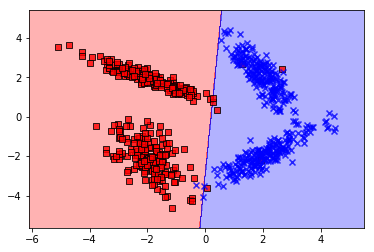

In [12]:
# Write code here
plot_decision_regions(X_test, y_test,logit, test_idx=None, resolution=0.02)

### (e) Construct the confusion matrix and report the model's accuracy, precision, and recall on the test data for the logistic regression classifier

In [14]:
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(logit.predict(X_test), y_test)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 356                   2
Actual Positive                   6                 386


In [17]:
cm=confusion_matrix(logit.predict(X_test), y_test)
cm

array([[356,   2],
       [  6, 386]])

In [18]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 99.48%
Accuracy = 98.93%
Recall = 98.47%


### (f) Create a support vector classifier with C = 10000 and kernel = linear and train it on the training data

In [20]:
# Write code here
clf = SVC(kernel='linear',C=10000)
clf.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### (g) Use the function plot_decision_regions to plot the test data with the support vector classifier

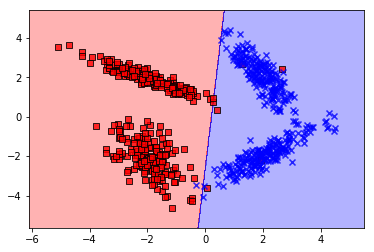

In [21]:
# Write code here
plot_decision_regions(X_test, y_test,clf, test_idx=None, resolution=0.02)

### (h) Construct the confusion matrix and report the model's accuracy, precision, and recall on the test data for the support vector classifier

In [22]:
# Write code here
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(clf.predict(X_test), y_test)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 357                   2
Actual Positive                   5                 386


In [23]:
cm=confusion_matrix(clf.predict(X_test), y_test)
cm

array([[357,   2],
       [  5, 386]])

In [24]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 99.48%
Accuracy = 99.07%
Recall = 98.72%


## 3

Given the countries dataset, we're going to engage in a rather interesting classification exercise. What we will try to do is classify whether a certain region is in Asia. Therefore, our target value will be the region masked as a binary integer: 0 or 1. 

1 will denote that the region is in Asia. 0 will denote otherwise.

You are tasked with preprocessing the data such that it's in a consumable format for the machine learning algorithm. You will then implement these models and do analysis on them.. Then you are to plot the data on the world map similar to previous assignments to show how accurate your classification model is.

In [59]:
countries = pd.read_csv('countries.csv')
countries['COUNTRY'] = countries['COUNTRY'].str.strip()
countries['Region'] = countries['Region'].str.strip()
countries = countries.dropna()

world = gpd.read_file('World_Countries.shp')

In [60]:
world.head()

,COUNTRY,geometry
0,Aruba (Netherlands),POLYGON ((-69.88223266601562 12.41110992431641...
1,Antigua and Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,..."
3,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...
4,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...


In [61]:
countries.head(50)

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678


### (a) Create a function region_to_binary which transforms the Region column to a binary value based on whether the region is in Asia or not.

In [62]:
countries['Region']=countries['Region'].astype(str)

In [63]:
def region_to_binary(row):
    # implement this function
    if row['Region'] =='ASIA (EX. NEAR EAST)':
        row['Region']=1
    else:
        row['Region']=0
    return row
binary_countries = countries.apply(region_to_binary, axis=1)
binary_countries.drop(columns=['COUNTRY'], axis=1, inplace=True)
binary_countries.dropna(inplace=True)
binary_countries.head()

,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,1,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,0,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,0,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


### (b) Split features into feature and target. In this case, target is the Region column. Afterwards, split the data into training and test set (let test_size=0.2).

In [64]:
# write code here
feature=[]
target=['Region']
for c in binary_countries.columns:
    if c not in ['Region']:
        feature.append(c)
np.random.seed(2016)
X_train, X_test, y_train, y_test = train_test_split(binary_countries[feature],binary_countries[target],test_size=0.2)

### (c) Implement a logistic regression model and train it on the training data

In [65]:
# write code here
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### (d) Construct the confusion matrix and report the logistic regression model's accuracy, precision, and recall on the test data 

In [66]:
# write code here
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(logreg.predict(X_test), y_test)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                  29                   2
Actual Positive                   1                   4


In [67]:
cm=confusion_matrix(logreg.predict(X_test), y_test)
cm

array([[29,  2],
       [ 1,  4]])

In [68]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 66.67%
Accuracy = 91.67%
Recall = 80.00%


In [69]:
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


### (e) Plot the predictions from the logistic regression model on the world map to show how accurate you were in predicting the correct regions.

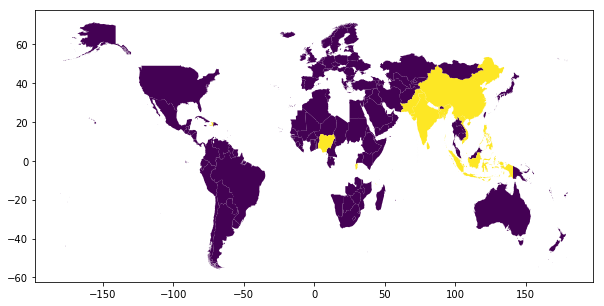

In [70]:
# write code here
countries['pred_reg'] = logreg.predict(binary_countries.iloc[:,1:])
merged = world.merge(countries,on="COUNTRY",how="right")
merged.dropna(inplace=True)
f,ax = plt.subplots(figsize=(10,5))
merged.plot(column="pred_reg",ax=ax)

### (f) Implement a support vector classifier and train it on the training data

In [71]:
# write code here
clf =SVC(kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### (g) Construct the confusion matrix and report the SVC's accuracy, precision, and recall on the test data

In [72]:
# write code here
# write code here
def print_confusion_matrix(predictions, labels):
    # Function for printing Confusion matrix, based on labels and predictions
    ls = list(confusion_matrix(predictions, labels)) ## returns tn, fp, fn, tp
    ls = pd.DataFrame(ls, columns = ['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix:\n", ls)
    
print_confusion_matrix(clf.predict(X_test), y_test)

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                  30                   6
Actual Positive                   0                   0


In [73]:
cm=confusion_matrix(clf.predict(X_test), y_test)
cm

array([[30,  6],
       [ 0,  0]])

In [74]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 0.00%
Accuracy = 83.33%
Recall = nan%


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


### (h) Plot the predictions from the support vector classifier on the world map to show how accurate you were in predicting the correct regions.

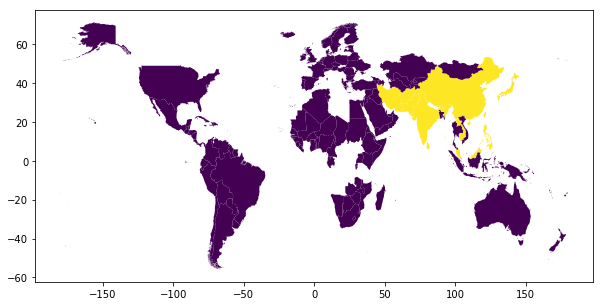

In [75]:
countries['pred_reg'] = clf.predict(binary_countries.iloc[:,1:])
merged = world.merge(countries,on="COUNTRY",how="right")
merged.dropna(inplace=True)
f,ax = plt.subplots(figsize=(10,5))
merged.plot(column="pred_reg",ax=ax)